In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Activation functions

def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1. - x)

def tanh(x):
    return numpy.tanh(x)

def dtanh(x):
    return 1. - x * x

def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)


In [25]:
#Base code borrowed from https://rolisz.ro/2013/04/18/neural-networks-in-python/

class NeuralNetwork:
    def __init__(self, layers, activation='tanh'):
        """
        :param layers: A list containing the number of units in each layer.
        Should be at least two values
        :param activation: The activation function to be used. Can be
        "logistic" or "tanh"
        """
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = dsigmoid
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = dtanh
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = drelu            

        self.weights = []
        for i in range(1, len(layers) - 1):
            self.weights.append((2*np.random.random((layers[i - 1] + 1, layers[i]
                                ))-1)*0.25)
        self.weights.append((2*np.random.random((layers[i] + 1, layers[i +
                            1]))-1)*0.25)

    def fit(self, X, y, learning_rate=0.2, epochs=10000):
        X = np.atleast_2d(X)
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, 0:-1] = X  # adding the bias unit to the input layer
        X = temp
        y = np.array(y)
        error_log=np.zeros([epochs,1]);
        delt_log=[]
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                hidden_inputs = np.ones([self.weights[l].shape[1] + 1])
                hidden_inputs[0:-1] = self.activation(np.dot(a[l], self.weights[l]))
                a.append(hidden_inputs)
            error = y[i] - a[-1][:-1]
            error_log[k]=np.mean(error**2);
            if k % 100 == 0:
                print('Epoch:'+str(k)+' error:'+str(error_log[k]));
            deltas = [error * self.activation_deriv(a[-1][:-1])]
            l = len(a) - 2

            # The last layer before the output is handled separately because of
            # the lack of bias node in output
            deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_deriv(a[l]))

            for l in range(len(a) -3, 0, -1): # we need to begin at the second to last layer
                deltas.append(deltas[-1][:-1].dot(self.weights[l].T)*self.activation_deriv(a[l]))

            deltas.reverse()
            for i in range(len(self.weights)-1):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta[:,:-1])
            # Handle last layer separately because it doesn't have a bias unit
            i+=1
            layer = np.atleast_2d(a[i])
            delta = np.atleast_2d(deltas[i])
            self.weights[i] += learning_rate * layer.T.dot(delta)
            delt_log.append(deltas)
        return error_log,delt_log;

    
            
    def predict(self, x):
        a = np.array(x)
        for l in range(0, len(self.weights)):
            temp = np.ones(a.shape[0]+1)
            temp[0:-1] = a
            a = self.activation(np.dot(temp, self.weights[l]))
        return a


In [16]:
# Data preprocessing

def target_to_outlayer(y):
    nlabels=np.max(y)+1
    y2=np.zeros([len(y),int(np.max(y))+1]);
    for i in range(len(y)):
     y2[i,int(y[i])]=1.0
    return y2
        

In [17]:
# Read data and labels

xtrain=np.genfromtxt('X_train.txt')
xtest=np.genfromtxt('X_test.txt')

ytrain=np.genfromtxt('Y_train.txt')
ytest=np.genfromtxt('Y_test.txt')

ytr=target_to_outlayer(ytrain)
yte=target_to_outlayer(ytest)


In [34]:
# Train network

nn=NeuralNetwork([561,200,100,50,30,7], 'sigmoid');
log1,delt=nn.fit(xtrain,ytr,0.05,200);


Epoch:0 error:[ 0.17683328]
Epoch:100 error:[ 0.13687262]


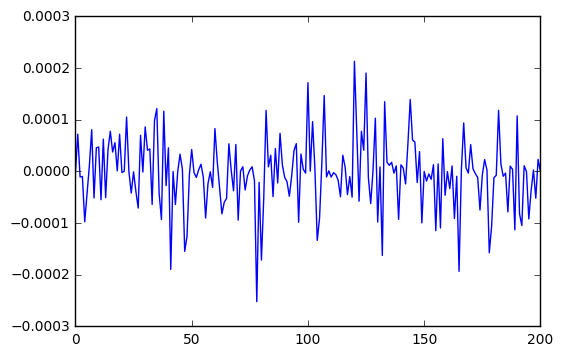

In [35]:
plt.plot(delt[:][0][0])
plt.show()

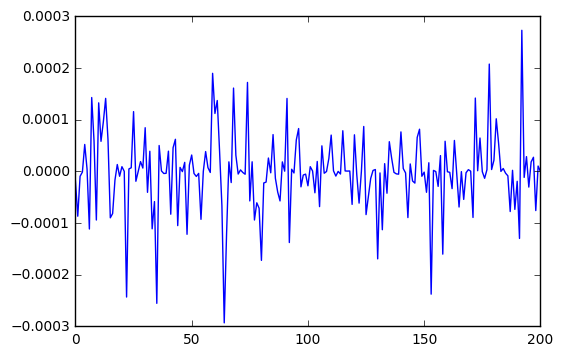

In [36]:
plt.plot(delt[:][1][0])
plt.show()

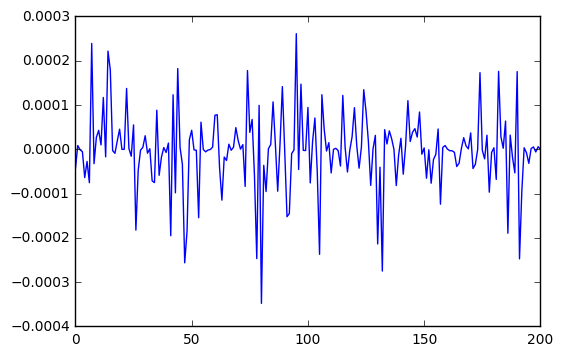

In [37]:
plt.plot(delt[:][2][0])
plt.show()

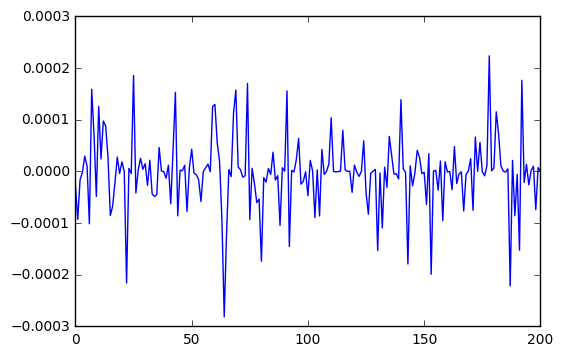

In [38]:
plt.plot(delt[:][3][0])
plt.show()

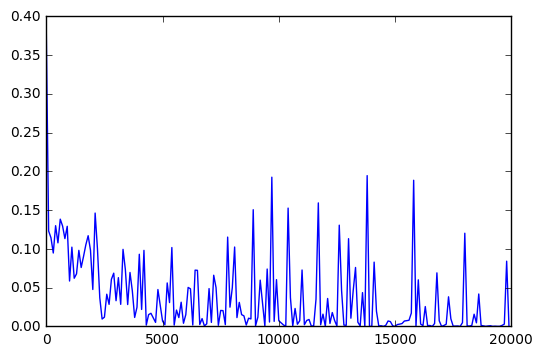

In [7]:
# Visualize learning
pl1=range(0,len(log1),100);
plt.plot(pl1,abs(log1[pl1]));
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Initialize output shape
ypr=np.zeros(yte.shape);
yprtr=np.zeros(ytr.shape);

# Calculate predictions for train and test set data
for i in range(xtest.shape[0]):
    ypr[i]=nn.predict(xtest[i]);
for i in range(xtrain.shape[0]):
    yprtr[i]=nn.predict(xtrain[i]);

# Converting to class label
ypred=np.argmax(ypr,1);
ypredtr=np.argmax(yprtr,1);

tr_acc=np.sum(ypredtr==ytrain)/len(ytrain)
test_acc=np.sum(ypred==ytest)/len(ytest)

print('Training accuracy:',tr_acc*100,'%')
print('Testing accuracy:',test_acc*100,'%')
print('\n\n')
print('Confusion matrix for training data:')
print(confusion_matrix(ytrain,ypredtr))
print('\n\n')
print('Confusion matrix for test data:')
print(confusion_matrix(ytest,ypred))
print('\n\n')
print('Classification report for training data:')
print(classification_report(ytrain,ypredtr))
print('\n\n')
print('Classification report for test data:')
print(classification_report(ytest,ypred))

Training accuracy: 94.613710555 %
Testing accuracy: 92.127587377 %



Confusion matrix for training data:
[[1223    2    1    0    0    0]
 [  16 1056    1    0    0    0]
 [  15   19  952    0    0    0]
 [   0    1    0 1188   93    4]
 [   0    2    0  240 1132    0]
 [   0    0    2    0    0 1405]]



Confusion matrix for test data:
[[487   0   9   0   0   0]
 [ 32 433   6   0   0   0]
 [ 26  41 353   0   0   0]
 [  0   3   0 453  34   1]
 [  0   2   0  78 452   0]
 [  0   0   0   0   0 537]]



Classification report for training data:
             precision    recall  f1-score   support

        1.0       0.98      1.00      0.99      1226
        2.0       0.98      0.98      0.98      1073
        3.0       1.00      0.97      0.98       986
        4.0       0.83      0.92      0.88      1286
        5.0       0.92      0.82      0.87      1374
        6.0       1.00      1.00      1.00      1407

avg / total       0.95      0.95      0.95      7352




Classification report f

In [5]:
print(sigmoid(0.2))
print(dsigmoid(0.02))

0.549833997312
0.0196


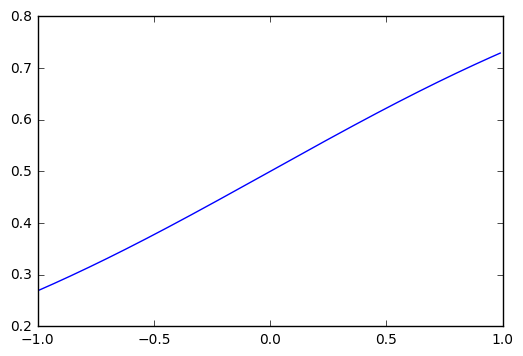

In [12]:
r1=np.arange(-1,1,0.01)
plt.plot(r1,sigmoid(r1))
plt.show()

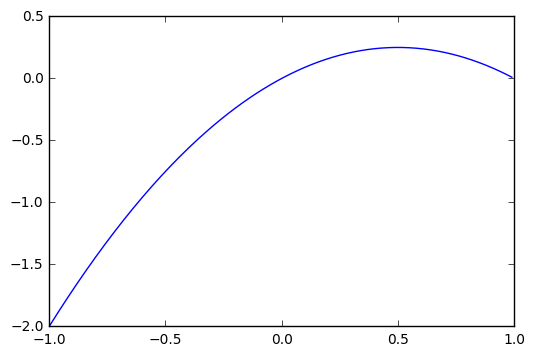

In [13]:
plt.plot(r1,dsigmoid(r1))
plt.show()